In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install tldextract
!pip install python-whois


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam

import whois
from bs4 import BeautifulSoup
import features as fe
import re
from urllib.parse import urlparse
import urllib
from datetime import datetime, date
import time
import requests

2024-03-20 11:03:47.695679: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 11:03:47.703591: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-20 11:03:47.792708: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-20 11:03:49.220395: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head(20)

,url,status,is_ip,length_url,length_hostname,tiny_url,CountAtSign,CountQuestionMark,CountHyphen,CountDot,...,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path,webTraffic,whoisRegistered
0,http://www.crestonwood.com/router.php,legitimate,0,37,19,0,0,0,0,3,...,7.0,4.500000,11,11,6,3,3,3,0,1
1,http://shadetreetechnology.com/V4/validation/a...,phishing,0,77,23,0,0,0,0,1,...,19.0,14.666667,32,19,32,2,19,2,0,1
2,https://support-appleld.com.secureupdate.duila...,phishing,0,126,50,0,0,1,1,4,...,8.4,8.142857,17,13,17,2,3,2,0,1
3,http://rgipt.ac.in,legitimate,0,18,11,0,0,0,0,2,...,5.0,0.000000,5,5,0,5,5,0,14064,1
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,0,55,15,0,0,0,2,2,...,5.0,7.000000,11,7,11,3,3,4,236847,1
5,http://appleid.apple.com-app.es/,phishing,0,32,24,0,0,0,1,3,...,4.5,0.000000,7,7,0,3,3,0,0,0
6,http://www.mutuo.it,legitimate,0,19,12,0,0,0,0,2,...,4.0,0.000000,5,5,0,3,3,0,0,1
7,http://www.shadetreetechnology.com/V4/validati...,phishing,0,81,27,0,0,0,0,2,...,11.0,14.666667,32,19,32,2,3,2,0,1
8,http://vamoaestudiarmedicina.blogspot.com/,legitimate,0,42,34,1,0,0,0,2,...,14.5,0.000000,21,21,0,8,8,0,0,0
9,https://parade.com/425836/joshwigler/the-amazi...,legitimate,0,104,10,0,0,0,10,1,...,6.0,5.538462,10,6,10,2,6,2,333766523,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  11430 non-null  object 
 1   status               11430 non-null  object 
 2   is_ip                11430 non-null  int64  
 3   length_url           11430 non-null  int64  
 4   length_hostname      11430 non-null  int64  
 5   tiny_url             11430 non-null  int64  
 6   CountAtSign          11430 non-null  int64  
 7   CountQuestionMark    11430 non-null  int64  
 8   CountHyphen          11430 non-null  int64  
 9   CountDot             11430 non-null  int64  
 10  CountComma           11430 non-null  int64  
 11  CountSemicolon       11430 non-null  int64  
 12  CountDollar          11430 non-null  int64  
 13  CountSlash           11430 non-null  int64  
 14  have_redirect        11430 non-null  int64  
 15  CountEqual           11430 non-null 

**Sơ đồ phân bố dữ liệu của một số đặc trưng**

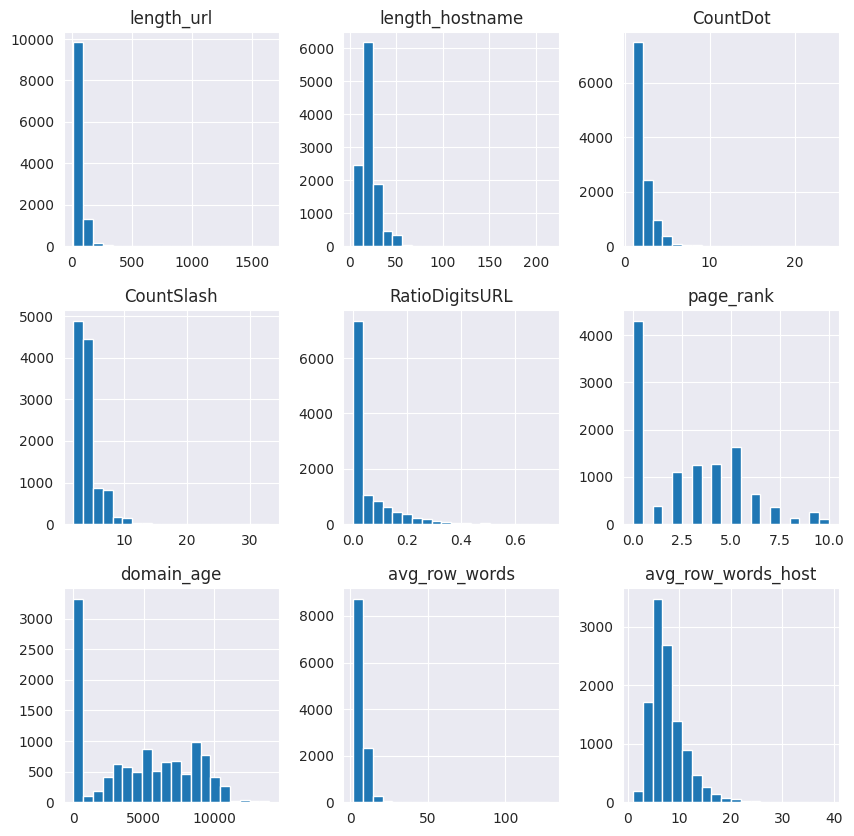

In [7]:
labels=["length_url","length_hostname","CountDot","CountSlash","RatioDigitsURL","page_rank","domain_age","avg_row_words","avg_row_words_host"]
#Plotting the data distribution
data[labels].hist(bins = 20,figsize = (10,10))
plt.show()

**Ma trận tương quan**

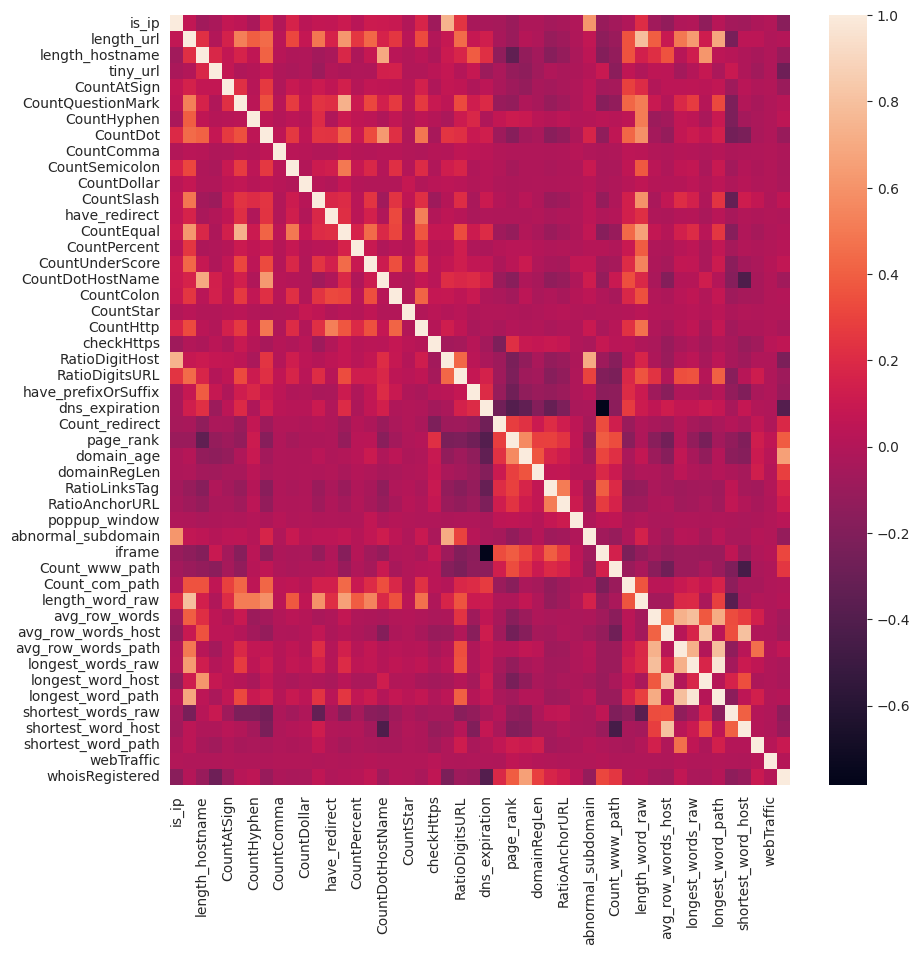

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data[data.columns[2:]].corr())
plt.show()

In [9]:
count = data.status.value_counts()

In [10]:
x = count.index
x

Index(['legitimate', 'phishing'], dtype='object', name='status')

Text(0, 0.5, 'Count')

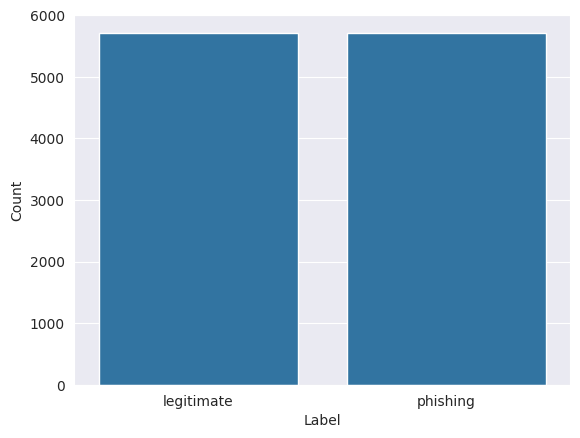

In [11]:
sns.barplot(x=count.index, y=count)
plt.xlabel('Label')
plt.ylabel('Count')

In [12]:
data['status'] = data['status'].map({'phishing': 1, 'legitimate': 0})

In [13]:
X = data.drop(['url', 'status'], axis=1).values
y = data['status'].values

#Train model

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale data

In [106]:
scaler_train = MinMaxScaler()
# fit scaler into data
scaler_train.fit(X_train)
# start scale
X_train = scaler_train.transform(X_train)


In [107]:
scaler_test = MinMaxScaler()
scaler_test.fit(X_test)
X_test = scaler_test.transform(X_test)

#Store result

In [108]:
model_list = []
accuracy_list = []
f1_score_list = []
recall_list = []
precision_list = []

def set_result(model, acc, f1, recall, precision):
  model_list.append(model)
  accuracy_list.append(round(acc,3))
  f1_score_list.append(round(f1,3))
  recall_list.append(round(recall,3))
  precision_list.append(round(precision,3))

#Neural Network

In [109]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(48,)))  # hidden layer with 128 neural
model.add(Dense(64, activation='relu'))  # another hidden layer with 64 neural
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # output layer with 1 neural     

/home/ngovi/phishing-detection/venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
286/286 - 2s - 7ms/step - accuracy: 0.8753 - loss: 0.3166
Epoch 2/30
286/286 - 0s - 2ms/step - accuracy: 0.9288 - loss: 0.1935
Epoch 3/30
286/286 - 0s - 2ms/step - accuracy: 0.9349 - loss: 0.1722
Epoch 4/30
286/286 - 0s - 2ms/step - accuracy: 0.9413 - loss: 0.1549
Epoch 5/30
286/286 - 0s - 1ms/step - accuracy: 0.9459 - loss: 0.1463
Epoch 6/30
286/286 - 0s - 1ms/step - accuracy: 0.9500 - loss: 0.1378
Epoch 7/30
286/286 - 0s - 1ms/step - accuracy: 0.9541 - loss: 0.1317
Epoch 8/30
286/286 - 0s - 1ms/step - accuracy: 0.9545 - loss: 0.1262
Epoch 9/30
286/286 - 0s - 1ms/step - accuracy: 0.9538 - loss: 0.1249
Epoch 10/30
286/286 - 0s - 1ms/step - accuracy: 0.9565 - loss: 0.1192
Epoch 11/30
286/286 - 0s - 1ms/step - accuracy: 0.9572 - loss: 0.1158
Epoch 12/30
286/286 - 0s - 1ms/step - accuracy: 0.9602 - loss: 0.1114
Epoch 13/30
286/286 - 0s - 1ms/step - accuracy: 0.9599 - loss: 0.1095
Epoch 14/30
286/286 - 0s - 1ms/step - accuracy: 0.9612 - loss: 0.1056
Epoch 15/30
286/286 - 0s - 2m

In [112]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)

Loss: 0.4096420407295227
Accuracy: 0.9085739254951477


In [113]:
nn_pred = model.predict(X_test)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [114]:
y_pred = np.round(nn_pred).astype(int)

In [115]:
y_pred = y_pred.reshape(-1)

In [116]:
pd.DataFrame({'y_test': y_test, 'predict': y_pred})

,y_test,predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
2281,1,1
2282,1,0
2283,1,1
2284,0,1


In [117]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1157
           1       0.90      0.92      0.91      1129

    accuracy                           0.91      2286
   macro avg       0.91      0.91      0.91      2286
weighted avg       0.91      0.91      0.91      2286


In [118]:
acc_score_nn = accuracy_score(y_pred, y_test)
f1_score_nn = f1_score(y_pred, y_test)
recall_score_nn = recall_score(y_pred, y_test)
precision_score_nn = precision_score(y_pred, y_test)

In [119]:
set_result('NN', acc_score_nn, f1_score_nn, recall_score_nn, precision_score_nn)

#Random Forest

In [135]:
randomForest = RandomForestClassifier()
model_rf = randomForest.fit(X_train, y_train)

In [136]:
rf_predict = model_rf.predict(X_test)

In [137]:
pd.DataFrame({'y_test': y_test, 'predict': rf_predict})

,y_test,predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
2281,1,1
2282,1,0
2283,1,1
2284,0,1


In [138]:
acc_score_rf = accuracy_score(rf_predict, y_test)
f1_score_rf = f1_score(rf_predict, y_test)
recall_score_rf = recall_score(rf_predict, y_test)
precision_score_rf = precision_score(rf_predict, y_test)

In [139]:
print(classification_report(rf_predict, y_test))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       985
           1       0.97      0.84      0.90      1301

    accuracy                           0.89      2286
   macro avg       0.89      0.90      0.89      2286
weighted avg       0.90      0.89      0.89      2286


In [140]:
set_result('RF', acc_score_rf, f1_score_rf, recall_score_rf, precision_score_rf)

#DescisionTree

In [141]:
dt = DecisionTreeClassifier(max_depth=26, min_samples_split=9, min_samples_leaf=4)

In [142]:
dt_model = dt.fit(X_train, y_train)

In [143]:
dt_predict = dt_model.predict(X_test)

In [144]:
pd.DataFrame({'y_test': y_test, 'predict': dt_predict})

,y_test,predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
2281,1,1
2282,1,0
2283,1,0
2284,0,1


In [145]:
print(classification_report(dt_predict, y_test))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1179
           1       0.83      0.85      0.84      1107

    accuracy                           0.84      2286
   macro avg       0.84      0.84      0.84      2286
weighted avg       0.84      0.84      0.84      2286


In [146]:
acc_score_dt = accuracy_score(dt_predict, y_test)
f1_score_dt = f1_score(dt_predict, y_test)
recall_score_dt = recall_score(dt_predict, y_test)
precision_score_dt = precision_score(dt_predict, y_test)

set_result('DT', acc_score_dt, f1_score_dt,
           recall_score_dt, precision_score_dt)

#Support vector machine

In [147]:
#linear kernel
linear_svm = SVC(kernel="linear")
linear_svm_model = linear_svm.fit(X_train, y_train)
linear_svm_predict = linear_svm_model.predict(X_test)

pd.DataFrame({'y_test': y_test, 'predict': linear_svm_predict})

print(classification_report(linear_svm_predict, y_test))

acc_score_svm_linear = accuracy_score(linear_svm_predict, y_test)
f1_score_svm_linear = f1_score(linear_svm_predict, y_test)
recall_score_svm_linear = recall_score(linear_svm_predict, y_test)
precision_score_svm_linear = precision_score(linear_svm_predict, y_test)

set_result('SVM_Linear', acc_score_svm_linear, f1_score_svm_linear,
           recall_score_svm_linear, precision_score_svm_linear)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1052
           1       0.95      0.87      0.91      1234

    accuracy                           0.90      2286
   macro avg       0.90      0.91      0.90      2286
weighted avg       0.91      0.90      0.90      2286


In [148]:
#RBF kernel
rbf_svm = SVC(kernel="rbf")
rbf_svm_model = rbf_svm.fit(X_train, y_train)
rbf_svm_predict = rbf_svm_model.predict(X_test)

pd.DataFrame({'y_test': y_test, 'predict': rbf_svm_predict})

print(classification_report(rbf_svm_predict, y_test))

acc_score_svm_rbf = accuracy_score(rbf_svm_predict, y_test)
f1_score_svm_rbf = f1_score(rbf_svm_predict, y_test)
recall_score_svm_rbf = recall_score(rbf_svm_predict, y_test)
precision_score_svm_rbf = precision_score(rbf_svm_predict, y_test)

set_result('SVM_RBF', acc_score_svm_rbf, f1_score_svm_rbf,
           recall_score_svm_rbf, precision_score_svm_rbf)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1099
           1       0.95      0.91      0.93      1187

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286


In [149]:
#Poly kernel
poly_svm = SVC(kernel='poly', gamma=0.1, coef0=1, degree=3)
poly_svm_model = poly_svm.fit(X_train, y_train)
poly_svm_predict = poly_svm_model.predict(X_test)

pd.DataFrame({'y_test': y_test, 'predict': poly_svm_predict})

print(classification_report(poly_svm_predict, y_test))

acc_score_svm_poly = accuracy_score(poly_svm_predict, y_test)
f1_score_svm_poly = f1_score(poly_svm_predict, y_test)
recall_score_svm_poly = recall_score(poly_svm_predict, y_test)
precision_score_svm_poly = precision_score(poly_svm_predict, y_test)

set_result('SVM_Poly', acc_score_svm_poly, f1_score_svm_poly,
           recall_score_svm_poly, precision_score_svm_poly)

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1086
           1       0.96      0.90      0.93      1200

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286


#Compare models


In [150]:
result = pd.DataFrame({
    'Model': model_list,
    'Accuracy': accuracy_list,
    'F1_Score': f1_score_list,
    'Recall': recall_list,
    'Precision': precision_list
})

In [151]:
result = result.sort_values(by=['Accuracy', 'F1_Score'], ascending=False).reset_index(drop=True)

In [152]:
result

,Model,Accuracy,F1_Score,Recall,Precision
0,SVM_RBF,0.930,0.931,0.908,0.955
1,SVM_Poly,0.925,0.927,0.899,0.956
2,NN,0.909,0.908,0.899,0.919
3,SVM_Linear,0.904,0.907,0.869,0.950
4,RF,0.892,0.899,0.839,0.967
5,DT,0.842,0.838,0.846,0.830


Text(0, 0.5, 'Accuracy')

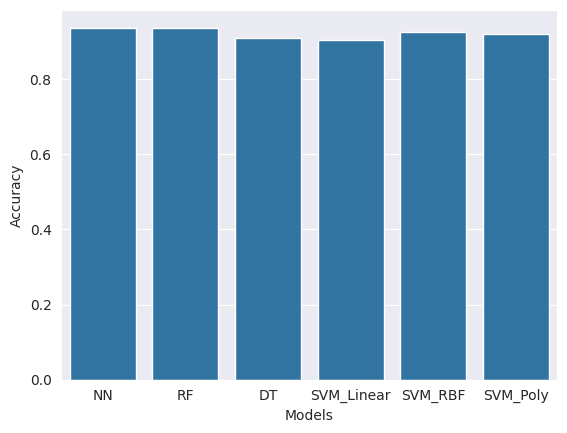

In [47]:
sns.barplot(x=model_list, y=accuracy_list)
plt.xlabel('Models')
plt.ylabel('Accuracy')

Text(0, 0.5, 'F1_Score')

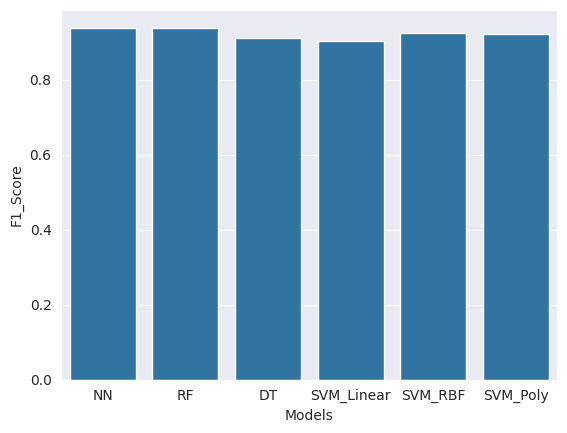

In [48]:
sns.barplot(x=model_list, y=f1_score_list)
plt.xlabel('Models')
plt.ylabel('F1_Score')

Text(0, 0.5, 'Recall')

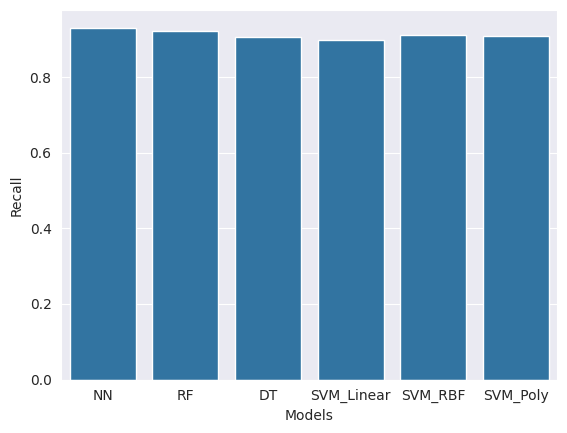

In [49]:
sns.barplot(x=model_list, y=recall_list)
plt.xlabel('Models')
plt.ylabel('Recall')

Text(0, 0.5, 'Precision')

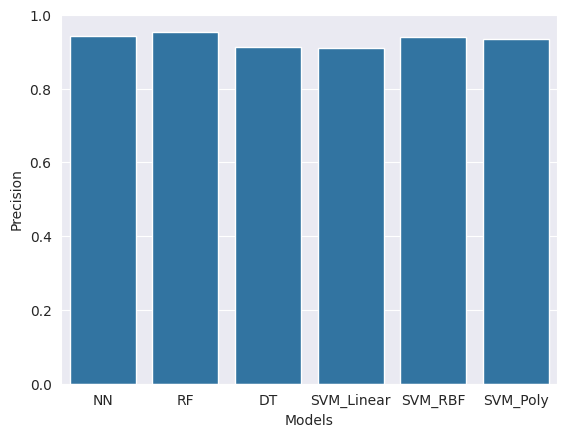

In [50]:
sns.barplot(x=model_list, y=precision_list)
plt.xlabel('Models')
plt.ylabel('Precision')

#Choose best model

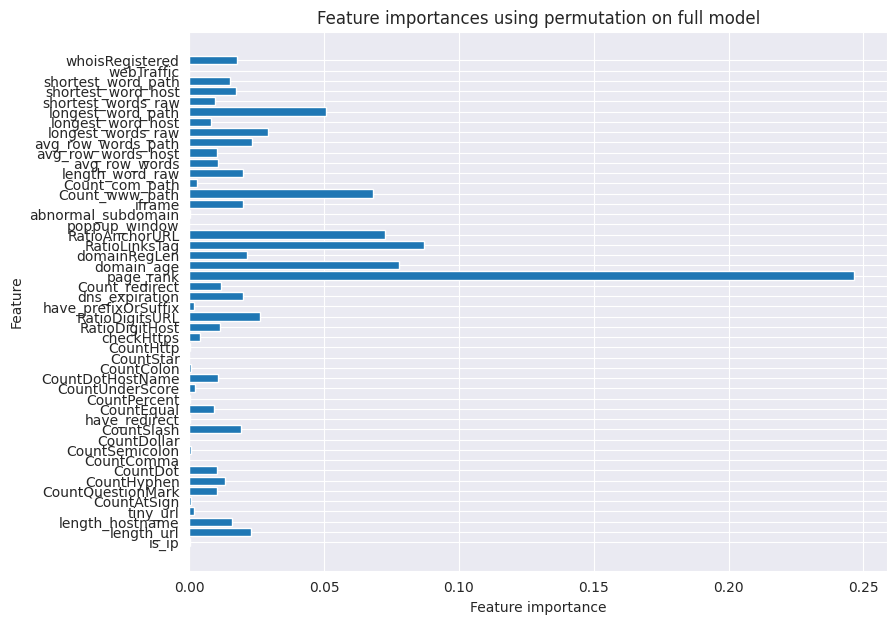

In [51]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), model_rf.feature_importances_, align='center')
plt.yticks(np.arange(n_features), data.columns[2:])
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#Test

In [52]:

def create_vector(url):
  key = "wgowgcc4s4os0os8skw4wckw88s8wwkccwcsgcgg"
  flag = 1
  features = []
  response =""
  content =""
  text =""
  soup =""
  try:
    response = requests.get(url,timeout=5)
    content = response.content
    text = response.text
    soup = BeautifulSoup(response.text, 'html.parser')
  except:
    response = ""
    content =""
    text=""
    soup=""

  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    flag = 0
  features.append(fe.is_ip(url)),

  features.append(fe.length_url(url)),
  features.append(fe.length_hostname(url)),

  features.append(fe.tiny_url(url)),
  features.append(fe.countAtSign(url)),

  features.append(fe.countQuestionMark(url)),
  features.append(fe.countHyphen(url)),

  features.append(fe.countDot(url)),
  features.append(fe.countComma(url)),

  features.append(fe.countSemicolon(url)),
  features.append(fe.countDollar(url)),

  features.append(fe.countSlash(url)),
  features.append(fe.have_redirect(url)),

  features.append(fe.CountEqual(url)),
  features.append(fe.CountPercent(url)),

  features.append(fe.CountUnderScore(url)),
  features.append(fe.CountDotHostName(url)),

  features.append(fe.CountColon(url)),
  features.append(fe.CountStar(url)),

  features.append(fe.CountHttp(url)),
  features.append(fe.check_https_protocol(url)),

  features.append(fe.RatioDigitsInHostname(url)),
  features.append(fe.RatioDigitsURL(url)),

  features.append(fe.have_prefixOrSuffix(url)),
  features.append(fe.dns_expiration(url)),

  features.append(fe.web_forwarding(response)),
  features.append(fe.page_rank(key,url)),

  features.append(0 if flag==0 else fe.DomainAge(domain_name)),
  features.append(0 if flag==0 else fe.DomainRegLen(domain_name)),
  features.append(fe.LinksInScriptTags(soup,url)),
  features.append(fe.AnchorURL(soup,url)),
  features.append(fe.popup_window(content)),
  features.append(fe.abnormal_subdomain(url)),
  features.append(fe.iframe(text)),

  features.append(fe.count_www_path(url)),
  features.append(fe.count_com_path(url)),
  features.append(fe.length_word_raw(url)),

  features.append(fe.average_word_length(fe.raw_words(url))),
  features.append(fe.average_word_length(fe.raw_words_host(url))),
  features.append(fe.average_word_length(fe.raw_words_path(url))),

  features.append(fe.longest_word_length(fe.raw_words(url))),
  features.append(fe.longest_word_length(fe.raw_words_host(url))),
  features.append(fe.longest_word_length(fe.raw_words_path(url))),

  features.append(fe.shortest_word_length(fe.raw_words(url))),
  features.append(fe.shortest_word_length(fe.raw_words_host(url))),
  features.append(fe.shortest_word_length(fe.raw_words_path(url))),
  features.append(fe.web_traffic(url)),
  features.append(fe.whois_registered_domain(url))

  return features


In [53]:
columns =[
  'is_ip',
  'length_url',
  'length_hostname',
  'tiny_url',
  'CountAtSign',
  'CountQuestionMark',
  'CountHyphen',
  'CountDot',
  'CountComma',
  'CountSemicolon',
  'CountDollar',
  'CountSlash',
  'have_redirect',
  'CountEqual',
  'CountPercent',
  'CountUnderScore',
  'CountDotHostName',
  'CountColon',
  'CountStar',
  'CountHttp',
  'checkHttps',
  'RatioDigitHost',
  'RatioDigitsURL',
  'have_prefixOrSuffix',
  'dns_expiration',
  'Count_redirect',
  'page_rank',
  'domain_age',
  'domainRegLen',
  'RatioLinksTag',
  'RatioAnchorURL',
  'poppup_window',
  'abnormal_subdomain',
  'iframe',
  'Count_www_path',
  'Count_com_path',
  'length_word_raw',
  'avg_row_words',
  'avg_row_words_host',
  'avg_row_words_path',
  'longest_words_raw',
  'longest_word_host',
  'longest_word_path',
  'shortest_words_raw',
  'shortest_word_host',
  'shortest_word_path',
  'webTraffic',
  'whoisRegistered',

]

In [54]:
url = ['https://www.google.com/', 'http://205.174.165.80/CICDataset/ISCX-URL-2016/',
       'https://kotaku.com/the-witcher-3-wild-hunt-the-kotaku-review-1703766283',
       'http://docs.python.org:80/3/library/urllib.parse.html?',

       	'https://usps.address-shipwatchers.shop/',
       'https://grtakeprize.com/it/bp4f/index?c=2277&affId=BC6DC089&c1=48&c2=1opCaODZewbK&c3=1c1e607843434706847313349c7444a0&c4=&c7=&c5=&c8=&c6=&i1=&t1=',
       'https://t.ly/EWZo9','http://fis-lab.com/wp-includes/images/smilies/front/wwpp/',

       'https://www.kaggle.com/busrabetulcavusoglu/', 'https://www.tdtu.edu.vn']

In [55]:
url_list = []
for i in url:
  url_list.append(create_vector(i))

Error trying to connect to socket: closing socket - timed out
Error trying to connect to socket: closing socket - timed out


In [56]:
df = pd.DataFrame(url_list, columns= columns)

In [57]:
df

,is_ip,length_url,length_hostname,tiny_url,CountAtSign,CountQuestionMark,CountHyphen,CountDot,CountComma,CountSemicolon,...,avg_row_words_host,avg_row_words_path,longest_words_raw,longest_word_host,longest_word_path,shortest_words_raw,shortest_word_host,shortest_word_path,webTraffic,whoisRegistered
0,0,23,14,0,0,0,0,2,0,0,...,4.500000,0.000000,6,6,0,3,3,0,1107210325,1
1,1,47,14,0,0,0,2,3,0,0,...,2.750000,4.000000,10,3,10,2,2,2,0,0
2,0,71,10,0,0,0,8,1,0,0,...,6.000000,4.888889,10,6,10,1,6,1,2074472,1
3,0,54,15,0,0,1,0,4,0,0,...,5.000000,4.600000,7,6,7,1,4,1,12225752,1
4,0,39,30,0,0,0,1,2,0,0,...,7.666667,0.000000,12,12,0,4,4,0,0,1
5,0,145,15,0,0,1,0,1,0,0,...,11.000000,4.750000,32,11,32,1,11,1,0,1
6,0,18,4,0,0,0,0,1,0,0,...,1.000000,5.000000,5,1,5,1,1,5,600140,1
7,0,57,11,0,0,0,2,1,0,0,...,3.000000,5.333333,8,3,8,2,3,2,0,0
8,0,43,14,0,0,0,0,2,0,0,...,4.500000,19.000000,19,6,19,3,3,19,1711869,1
9,0,23,15,0,0,0,0,3,0,0,...,3.500000,0.000000,4,4,0,3,3,0,25847,0


In [58]:
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.fit_transform(df)

#Predict

In [59]:
rf_predict = model_rf.predict(df)

In [60]:
result = rf_predict.tolist()

In [61]:
expected = [0, 1, 0, 0, 1, 1, 1, 1, 0, 0]

In [62]:
combine = {'url': url, 'predict': result, 'expected': expected}

In [63]:
df_predict = pd.DataFrame(combine)

In [64]:
df_predict

,url,predict,expected
0,https://www.google.com/,0,0
1,http://205.174.165.80/CICDataset/ISCX-URL-2016/,1,1
2,https://kotaku.com/the-witcher-3-wild-hunt-the...,1,0
3,http://docs.python.org:80/3/library/urllib.par...,1,0
4,https://usps.address-shipwatchers.shop/,1,1
5,https://grtakeprize.com/it/bp4f/index?c=2277&a...,1,1
6,https://t.ly/EWZo9,1,1
7,http://fis-lab.com/wp-includes/images/smilies/...,1,1
8,https://www.kaggle.com/busrabetulcavusoglu/,1,0
9,https://www.tdtu.edu.vn,0,0
